### Выполнил: Шикри Илья


In [74]:
import math
import random
import scipy.stats as sp

x0 = 0.2
n = 10
lmbd = 0.1



x, y = [], []


def get_expected_value_theory():
    return 1/lmbd

def get_expected_value_practice():
    #return (1/n)*sum(y)
    return sp.describe(y).mean

def get_err (theory, practice):
    return (abs(theory-practice)/theory)*100

def get_expected_value_err():
    return get_err(get_expected_value_theory(), get_expected_value_practice())

def get_dispersion_theory():
    return 1/(lmbd**2) 

def get_dispersion_practice():
    squared_deviation = []
    for yi in y:
        squared_deviation.append( abs(yi-get_expected_value_practice()) )    
    return sum(squared_deviation)

def get_dispersion_err():
    return get_err(get_dispersion_theory(), get_dispersion_practice())

def get_distribution_theory(x):
    return 1-math.exp((-1)*lmbd*x)

def get_interval_count_less_x(x):
    count = 0
    for yi in y:
        if (yi < x):
            count += 1
    return count

def get_distribution_practice(x):
    return get_interval_count_less_x(x)/n

def get_distribution_err(x):
    return abs(get_distribution_theory(x)-get_distribution_practice(x))


def get_y (x):
    return (-1)*(math.log(1-x)/lmbd)


for i in range(0,n):
    x.append(random.randrange(0, 100, 1)/100)
    y.append( get_y(x[-1]) )

print(get_expected_value_err())
print(get_dispersion_err())
print(get_distribution_err(x0))


7.772381062480331
627.9903769527218
0.00019867330675525305


### Далее будет гистограма..

In [81]:
import numpy as np
import matplotlib.pyplot as plt

z = []
frequency_density = []

def get_digits_with_equal_length ():
    m = 1.44*math.log(n) + 1    
    mean_length = sum(y)/m

    z.insert(1,0)
    for i in range(1,n):
        z.insert(i, z[i-1]+mean_length)           

    return z  


def get_digit_length (i):
    for yi in range(len(y)):
        if z[i]<=sum(y[0:yi]):
            return i
    return i

def get_frequency_density ():
    for i in range(len(z)-1):
        delta_i = z[i+1]-z[i]
        if delta_i> 0 :
    
            density = get_digit_length(i)/(n*delta_i)
            frequency_density.insert(i,float(density))

            
get_digits_with_equal_length ()
get_frequency_density ()





8.578571404205508e-05
-7.081070482784688e-05


ValueError: math domain error

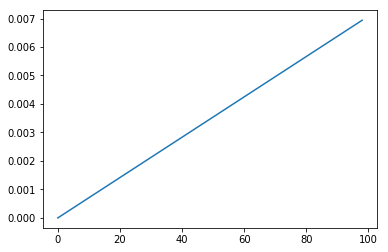

In [85]:
#распр плотности
def get_density_distribution(x):
    return lmbd*math.exp((-1)*lmbd*x)


plt.plot(frequency_density)

#похожесть
def get_measure_of_similarity(): 
    deviations = []
    
    for i in range(len(z)-1):
        average_z = (z[i] + z[i+1])/2
        print(get_density_distribution(average_z) - frequency_density[i])
        deviation = math.sqrt(get_density_distribution(average_z) - frequency_density[i])
        deviations.append(deviation)
    return sum(deviations)


get_measure_of_similarity()

In [86]:
! git add * 
! git commit -m !
! git push

The file will have its original line endings in your working directory
The file will have its original line endings in your working directory


[main fa99f1c] !
 2 files changed, 354 insertions(+), 170 deletions(-)


To https://github.com/russianSlave/queuing_theory_lab1.git
   9e4b69c..fa99f1c  main -> main


In [59]:

import numpy as np

a = np.array([ 0.   ,  0.005 , 0.124, 0.  ,   0.004,  0.  ,   0.111  ,0.112])
# [ 0.     0.005  0.124  0.     0.004  0.     0.111  0.112]

# You can set arbitrary bin edges:
bins = [0, 0.150]
hist, bin_edges = np.histogram(a, bins=bins)
# hist: [8]
# bin_edges: [ 0.    0.15]

# Or, if bin is an integer, you can set the number of bins:
bins = 4
hist, bin_edges = np.histogram(a, bins=bins)
# hist: [5 0 0 3]
# bin_edges: [ 0.     0.031  0.062  0.093  0.124]
bin_edges



cum = [1,2,3,4,5]
cum[0:]

[]

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 8. ]


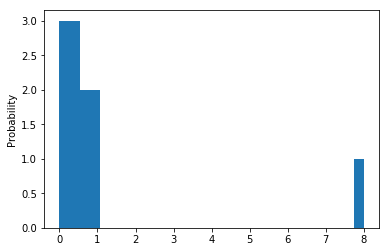

In [175]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
x = np.array([0.,  0.1, 0.2,0.3, 0.4 ,0.5 ,0.6,0.7, 0.8 ,0.9,8])
print(x)
plt.hist(x, normed=False, bins=30)
plt.ylabel('Probability');